# Stage 1: EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np

In [3]:
RAW_EXERCISES = Path('raw/exercise.csv')
RAW_CALORIES = Path('raw/calories.csv')
PROCESSED_MALES = Path('processed/males.csv')
PROCESSED_FEMALES = Path('processed/females.csv')

### Loading and getting familiar with the data

In [4]:
df_exercises = pd.read_csv(RAW_EXERCISES)
df_calories = pd.read_csv(RAW_CALORIES)

In [5]:
print(df_exercises.head(3))
print(df_calories.head(3))

    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
    User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0


### Merging and creating a copy of the data

In [6]:
df = df_exercises.merge(df_calories, left_on='User_ID', right_on='User_ID').drop(columns='User_ID')
df_copy = df.copy()

df.head(3)

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0


### Checking data types and number of missing values

In [7]:
df.dtypes

Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

In [8]:
df.isna().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [9]:
df['Duration'] = df['Duration'].astype('int')
df['Heart_Rate'] = df['Heart_Rate'].astype('int')
df['Gender'].unique()

array(['male', 'female'], dtype=object)

### Correlation heatmap

<Axes: >

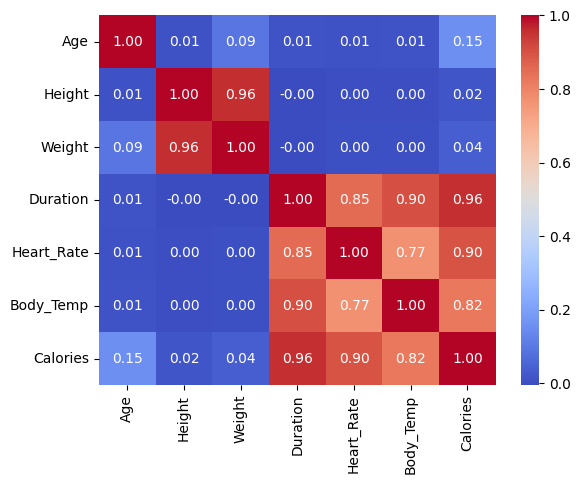

In [10]:
sns.heatmap(data=df.drop(columns='Gender').corr(), annot=True, fmt='.2f', cmap='coolwarm')

### Scatterplots and boxplots

<Axes: ylabel='Body temperature [degrees Celsiuss]'>

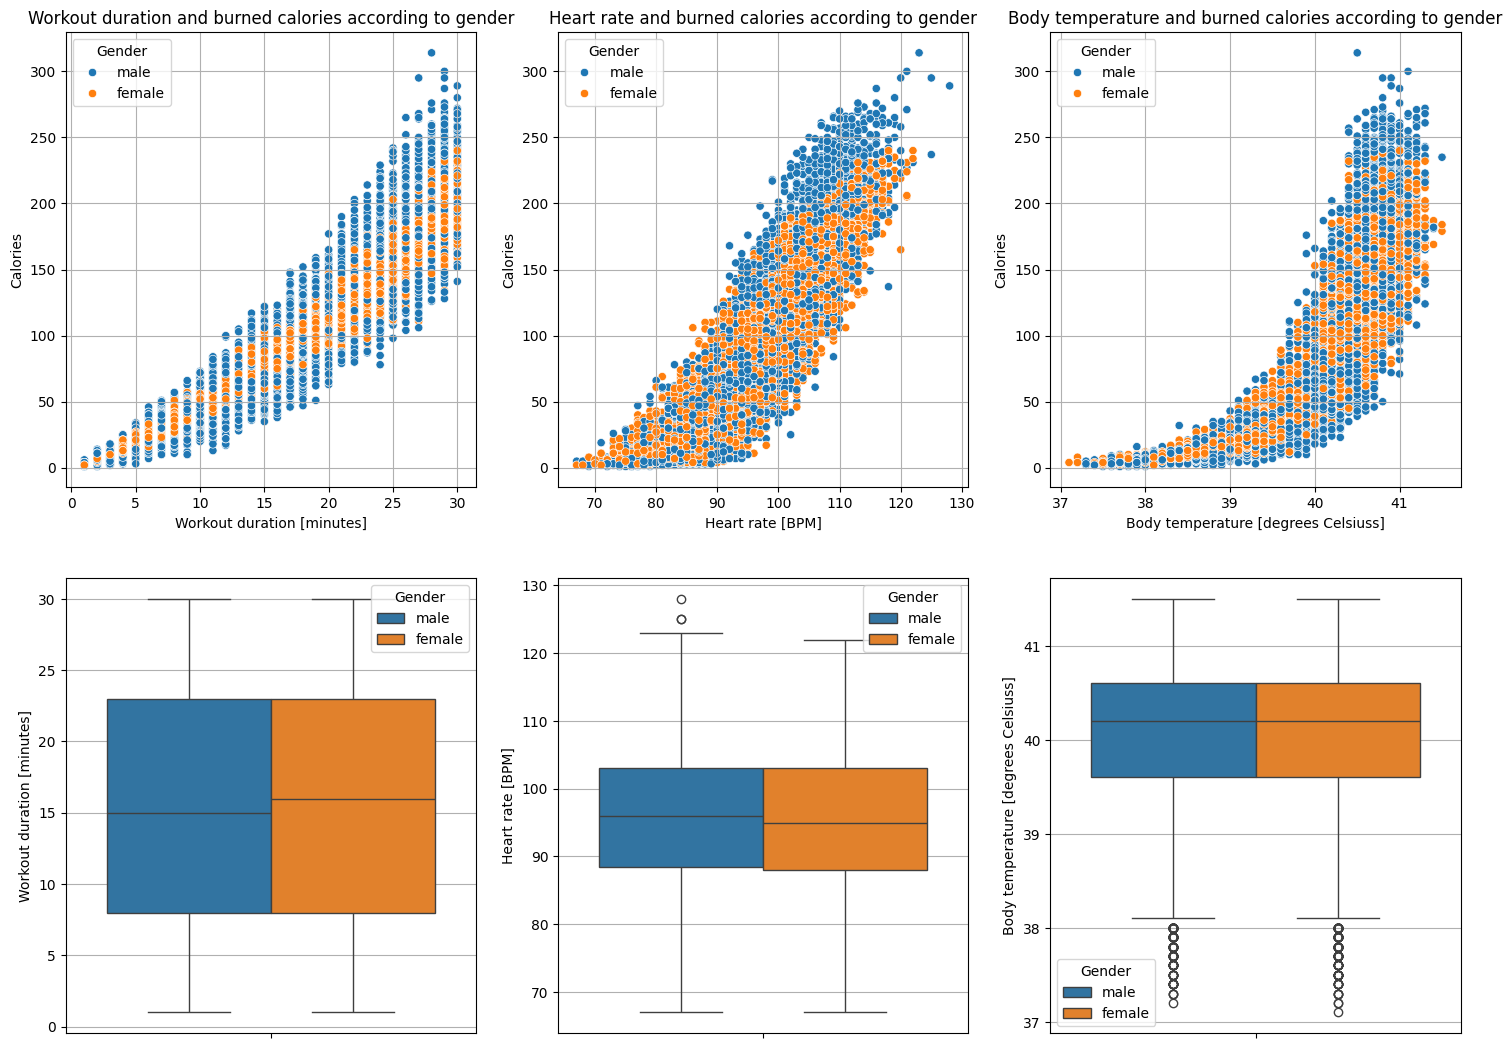

In [11]:
# Scatterplots
plt.subplots(2,3, figsize=(18,13))
plt.subplot(231)
plt.title('Workout duration and burned calories according to gender')
plt.ylabel('Calories')
plt.xlabel('Workout duration [minutes]')
plt.grid()
sns.scatterplot(data=df, x='Duration', y='Calories', hue='Gender')
plt.subplot(232)
plt.title('Heart rate and burned calories according to gender')
plt.ylabel('Calories')
plt.xlabel('Heart rate [BPM]')
plt.grid()
sns.scatterplot(data=df, x='Heart_Rate', y='Calories', hue='Gender')
plt.subplot(233)
plt.title('Body temperature and burned calories according to gender')
plt.ylabel('Calories')
plt.xlabel('Body temperature [degrees Celsiuss]')
plt.grid()
sns.scatterplot(data=df, x='Body_Temp', y='Calories', hue='Gender')
# Boxplots
plt.subplot(234)
plt.ylabel('Workout duration [minutes]')
plt.grid()
sns.boxplot(data=df, y='Duration', hue='Gender'),
plt.subplot(235)
plt.ylabel('Heart rate [BPM]')
plt.grid()
sns.boxplot(data=df, y='Heart_Rate', hue='Gender')
plt.subplot(236)
plt.ylabel('Body temperature [degrees Celsiuss]')
plt.grid()
sns.boxplot(data=df, y='Body_Temp', hue='Gender')

### Removing outliers using the interquartile range and reanalyzing the plots

In [12]:
Q1 = df['Body_Temp'].quantile(0.25)
Q3 = df['Body_Temp'].quantile(0.75)
IQR = Q3 - Q1
df = df[df['Body_Temp'].between(Q1-(1.5*IQR), Q3+(IQR*1.5))]

<Axes: ylabel='Body temperature [degrees Celsiuss]'>

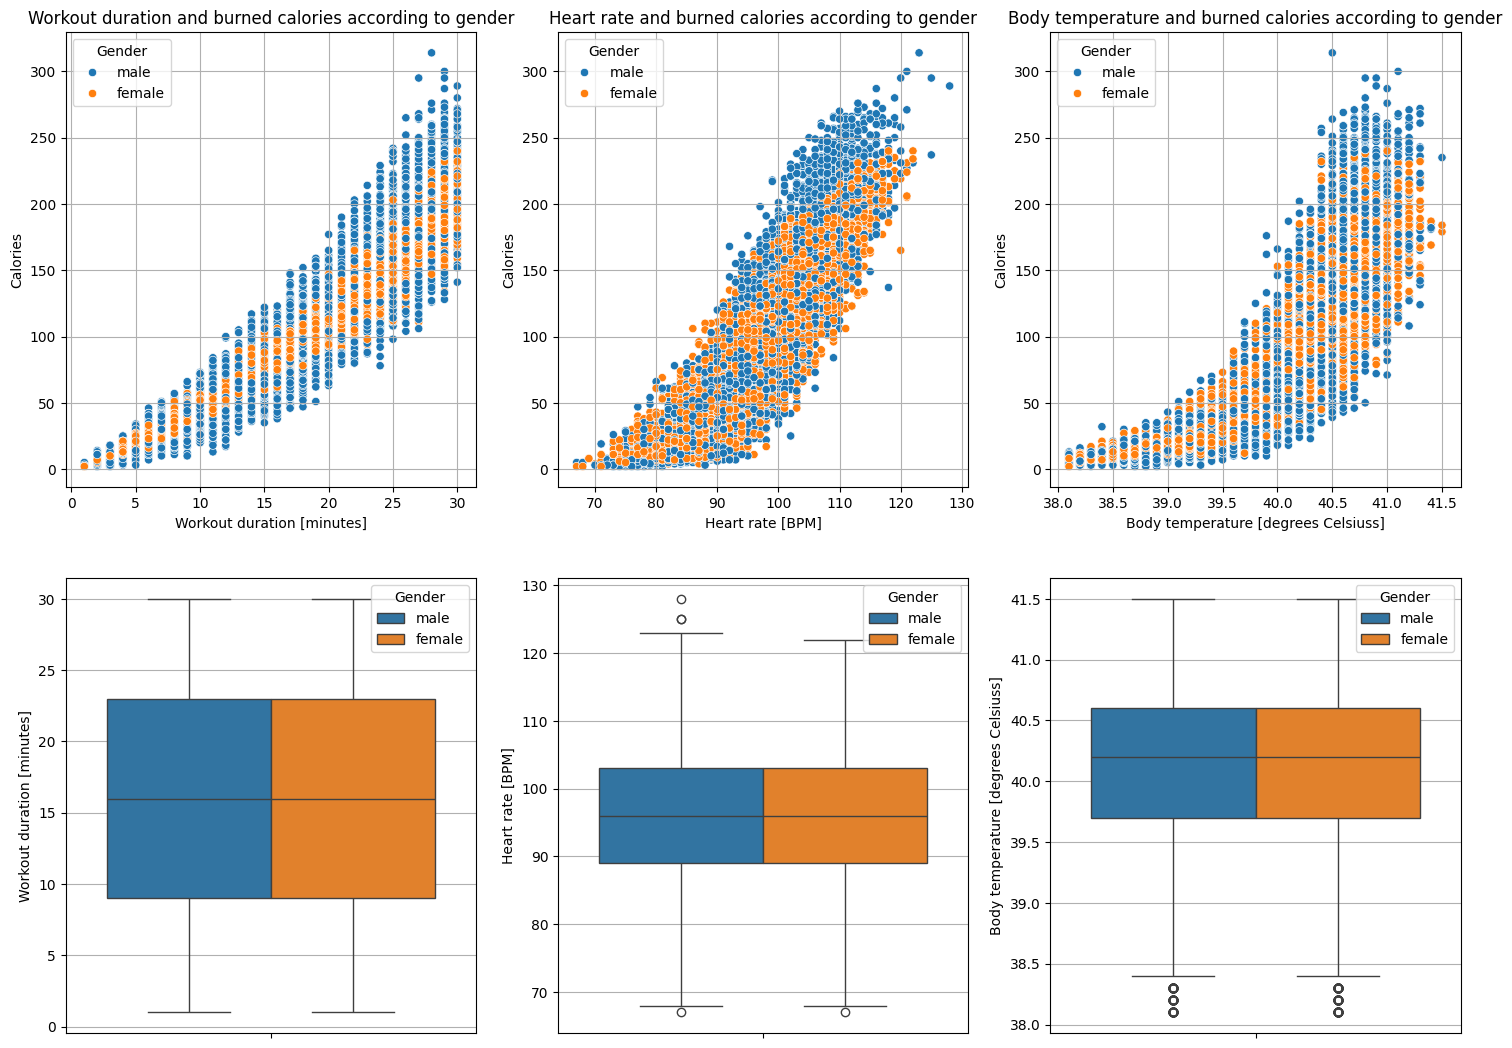

In [13]:
# Scatterplots
plt.subplots(2,3, figsize=(18,13))
plt.subplot(231)
plt.title('Workout duration and burned calories according to gender')
plt.ylabel('Calories')
plt.xlabel('Workout duration [minutes]')
plt.grid()
sns.scatterplot(data=df, x='Duration', y='Calories', hue='Gender')
plt.subplot(232)
plt.title('Heart rate and burned calories according to gender')
plt.ylabel('Calories')
plt.xlabel('Heart rate [BPM]')
plt.grid()
sns.scatterplot(data=df, x='Heart_Rate', y='Calories', hue='Gender')
plt.subplot(233)
plt.title('Body temperature and burned calories according to gender')
plt.ylabel('Calories')
plt.xlabel('Body temperature [degrees Celsiuss]')
plt.grid()
sns.scatterplot(data=df, x='Body_Temp', y='Calories', hue='Gender')
# Boxplots
plt.subplot(234)
plt.ylabel('Workout duration [minutes]')
plt.grid()
sns.boxplot(data=df, y='Duration', hue='Gender'),
plt.subplot(235)
plt.ylabel('Heart rate [BPM]')
plt.grid()
sns.boxplot(data=df, y='Heart_Rate', hue='Gender')
plt.subplot(236)
plt.ylabel('Body temperature [degrees Celsiuss]')
plt.grid()
sns.boxplot(data=df, y='Body_Temp', hue='Gender')

In [14]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [15]:
df = df[['Gender', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']]
df.head(3)

,Gender,Duration,Heart_Rate,Body_Temp,Calories
0,male,29,105,40.8,231.0
1,female,14,94,40.3,66.0
2,male,5,88,38.7,26.0


### Splitting the data by gender

In [16]:
df_males = df[df['Gender'] == 'male'].drop(columns='Gender')
df_females = df[df['Gender'] == 'female'].drop(columns='Gender')

### Exporting the prepared data to CSV files

In [17]:
df_males.to_csv(PROCESSED_MALES)
df_females.to_csv(PROCESSED_FEMALES)

# Step 2: Splitting the data, training, and evaluating the model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

### Splitting into independent and dependent variables by gender

In [19]:
X_males = df_males[['Duration', 'Heart_Rate', 'Body_Temp']]
y_males = df_males['Calories']
X_females= df_females[['Duration', 'Heart_Rate', 'Body_Temp']]
y_females = df_females['Calories']

### Splitting into training and test sets by gender

In [20]:
X_males_train, X_males_test, y_males_train, y_males_test = train_test_split(X_males, y_males, test_size=0.3, random_state=42)
X_females_train, X_females_test, y_females_train, y_females_test = train_test_split(X_females, y_females, test_size=0.3, random_state=42)

### Creating class instances and training the models

In [21]:
lm_males = LinearRegression()
lm_females = LinearRegression()
lm_males.fit(X_males_train, y_males_train)
lm_females.fit(X_females_train, y_females_train)

LinearRegression()

### Predictions, visualizations, and metrics

In [22]:
df_coefs = pd.DataFrame(
    {'Females linear coefficient': lm_females.coef_,
    'Males linear coefficient': lm_males.coef_},
    index=X_males.columns)
df_coefs

,Females linear coefficient,Males linear coefficient
Duration,6.446386,6.948862
Heart_Rate,1.679007,2.333261
Body_Temp,-14.995103,-20.087459


In [23]:
predicted_males = lm_males.predict(X_males_test)
predicted_females = lm_females.predict(X_females_test)

residuals_males = y_males_test - predicted_males
residuals_females = y_females_test - predicted_females

In [24]:
df_metrics = pd.DataFrame({'Females': [mean_absolute_error(predicted_females, y_females_test), r2_score(predicted_females, y_females_test)],
                          'Males': [mean_absolute_error(predicted_males, y_males_test), r2_score(predicted_males, y_males_test)]},
                          index=['MAE', 'R_squared'])
df_metrics

,Females,Males
MAE,6.702942,14.464262
R_squared,0.977285,0.917716


<Axes: title={'center': 'Histogram reszt – kobiety'}, xlabel='Reszty', ylabel='Liczba obserwacji'>

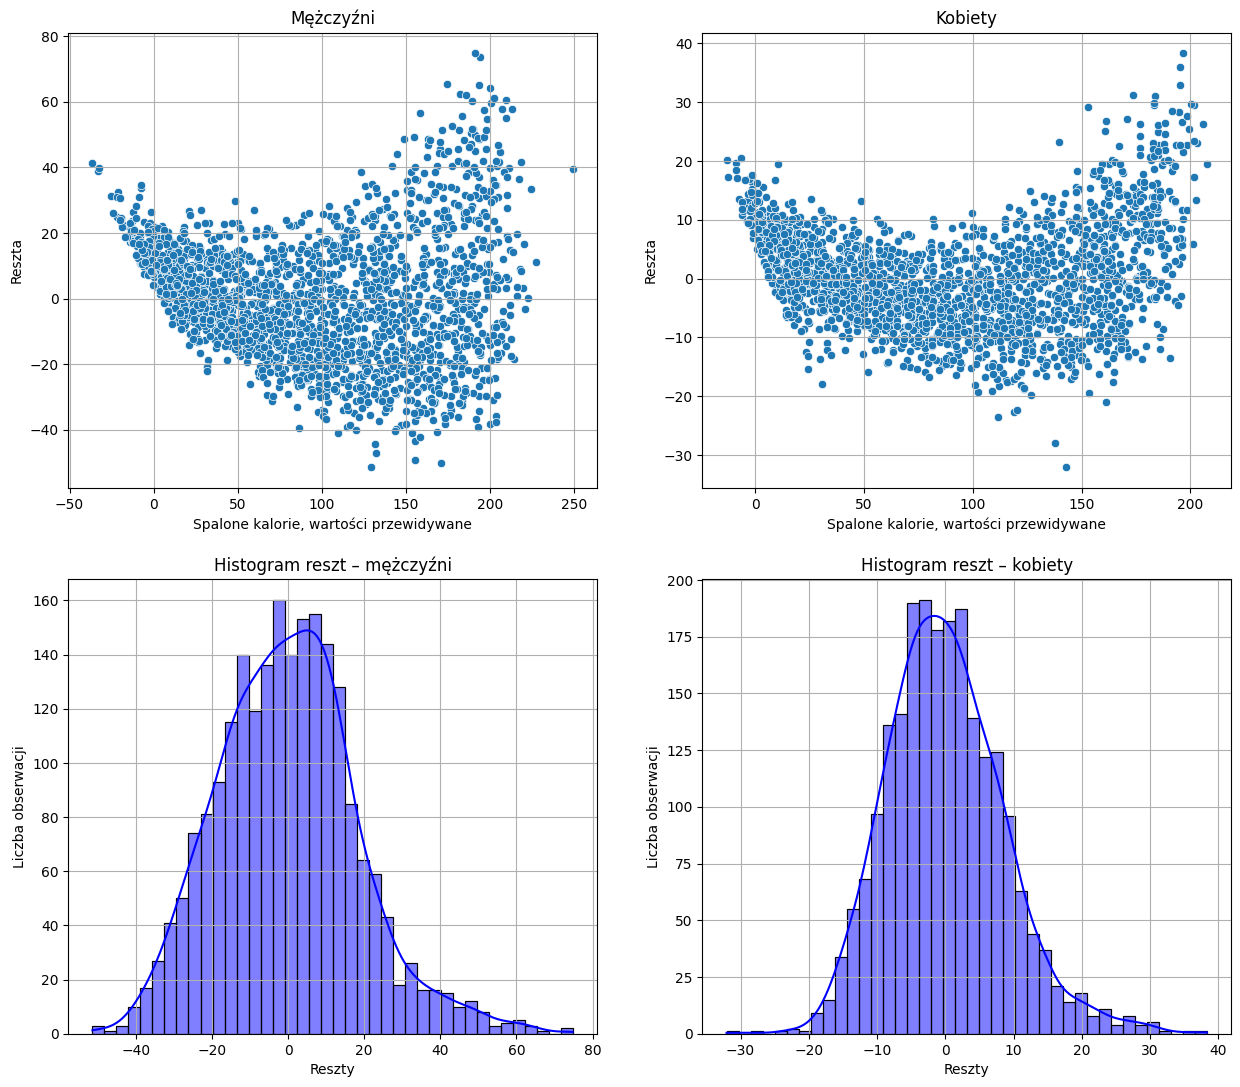

In [25]:
plt.subplots(2, 2, figsize=(15,13))
plt.subplot(221)
plt.xlabel('Spalone kalorie, wartości przewidywane')
plt.ylabel('Reszta')
plt.title('Mężczyźni')
plt.grid()
sns.scatterplot(x=predicted_males, y=residuals_males)
plt.subplot(223)
plt.xlabel('Reszty')
plt.ylabel('Liczba obserwacji')
plt.title('Histogram reszt – mężczyźni')
plt.grid()
sns.histplot(residuals_males, bins=40, kde=True, color='blue')
plt.subplot(222)
plt.xlabel('Spalone kalorie, wartości przewidywane')
plt.ylabel('Reszta')
plt.title('Kobiety')
plt.grid()
sns.scatterplot(x=predicted_females, y=residuals_females)
plt.subplot(224)
plt.xlabel('Reszty')
plt.ylabel('Liczba obserwacji')
plt.title('Histogram reszt – kobiety')
plt.grid()
sns.histplot(residuals_females, bins=40, kde=True, color='blue')

### Saving trained models to a .pkl files

In [26]:
import joblib

In [27]:
joblib.dump(lm_males, 'models/lm_males.pkl')
joblib.dump(lm_females, 'models/lm_females.pkl')

['models/lm_females.pkl']